### ETUDE DE CAS :

# Prédiction des prix maison : 

### I . Importation et nettoyage rapide de la donnée 

on ne gardera que les valeurs numériques non nulles pour notre analyse.

source DATA : 
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [3]:
# Charger le dataset récupérer sur Kaggle pour l'inspecter avec la librairie pandas
data = pd.read_csv('house-prices-dataset/train.csv')

In [4]:
# data exploration, 
# premier 
# regard de la donnée, à quoi elle ressemble
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dans cette étape, nous procédons au nettoyage de notre dataset en ne conservant que les colonnes numériques qui ne contiennent aucune valeur nulle. Cela nous permet de travailler avec un ensemble de données propre et sans lacunes, facilitant ainsi les analyses statistiques et les modélisations ultérieures. Voici comment nous effectuons ce nettoyage :

    Nous sélectionnons d'abord toutes les colonnes numériques du dataset.
    Ensuite, nous filtrons ces colonnes pour ne conserver que celles qui ne contiennent aucune valeur nulle.

Ce processus assure que notre dataset est exempt de valeurs manquantes dans les colonnes numériques, ce qui est crucial pour garantir la fiabilité de nos analyses.

In [5]:

# Sélectionner uniquement les colonnes numériques
numeric_data_cols = data.select_dtypes(include=[np.number])

# Filtrer les colonnes qui ne contiennent pas de valeurs nulles
numeric_cols_no_nulls = numeric_data_cols.dropna(axis=1)

print(f' les colonnes du dataset : {numeric_data_cols.columns.values}')

numeric_cols_no_nulls = numeric_cols_no_nulls.drop(columns=['Id'])

# Afficher les premières lignes du nouveau DataFrame pour vérifier
print(numeric_cols_no_nulls.head())

 les colonnes du dataset : ['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']
   MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtF

### II - Regression linéaire simple : 

On va essayer d'établir les différentes étapes d'une regression linéaire entre l'inférence, la fonction coût, la descente de gradient et l'algo d'entrainement.

#### 1 . Modèle linéaire : 

On implémente un modèle simple 
 $F = X.\theta$.


In [6]:
def model(X, theta):
    return X.dot(theta)


#### 2. Fonction Coût 
 
 On part sur une fonction coût basique qui a fait ses preuves et qui est largement utilisée :
 
-   **MSE** : Mean Squared Error  :

${MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$.


In [7]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

3. Gradient et Descente de Gradient

Le gradient est calculé pour la fonction coût qu'on a défini plus haut.

ainsi cela donne 
$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

la desente de gradient se fait alors en mettant à jour les paramètres du modèle en soustrayant la valeur du gradient.
$\theta = \theta-\alpha  \frac{\partial J(\theta) }{\partial \theta}$

In [8]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)


In [9]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # on log les coùts par itération pour voir l'évolution.
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history


### III -  Application à notre cas pratique

#### 1 - Initialisation :  

In [10]:
# Sélectionner les features 
x = numeric_cols_no_nulls.iloc[:, :-1].values

# Sélectionner la target colonne 'SalePrice' 
y = numeric_cols_no_nulls['SalePrice'].values

In [11]:
from sklearn.preprocessing import StandardScaler

# Normaliser les features
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)


In [12]:
# Verification des dimensions
print(x_normalized.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)


(1460, 33)
(1460,)
(1460, 1)


In [13]:
# Création de la matrice X, en incluant le Biais
X = np.hstack((x_normalized, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(x.shape[1]+1, 1)


#### 2 - phase d'entraînement : 

In [14]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [16]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final


array([[-6.54140273e+03],
       [ 3.88762957e+03],
       [ 2.44120104e+04],
       [ 4.48029730e+03],
       [ 8.97052042e+03],
       [ 3.60408539e+03],
       [ 5.27711921e+03],
       [-5.13141690e+02],
       [ 2.13164170e+01],
       [ 5.32148793e+03],
       [ 8.17224660e+03],
       [ 9.17227488e+03],
       [-1.66862774e+02],
       [ 1.36168759e+04],
       [ 4.25354699e+03],
       [ 5.16951359e+02],
       [ 3.04206330e+03],
       [ 1.83228503e+02],
       [-8.16390038e+03],
       [-3.13142635e+03],
       [ 8.50374586e+03],
       [ 2.69524790e+03],
       [ 6.63353006e+03],
       [ 1.99949500e+03],
       [ 3.33723213e+03],
       [-4.69213102e+02],
       [ 3.95803194e+02],
       [ 5.55501801e+02],
       [ 3.16116094e+03],
       [-1.67780913e+03],
       [-4.35868129e+02],
       [-2.58731781e+02],
       [-1.02728369e+03],
       [ 1.80913385e+05]])

#### 3. Courbe d'apprentissage 

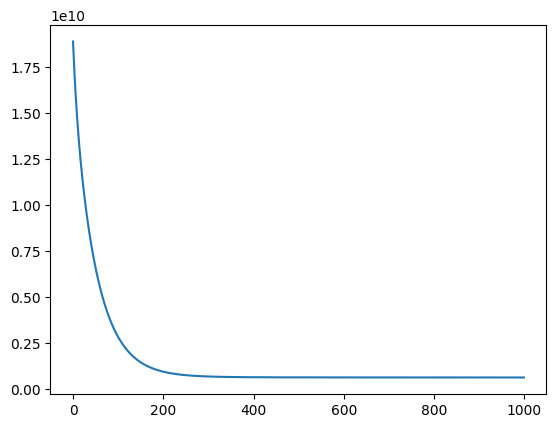

In [17]:
plt.plot(range(n_iterations), cost_history)


### 4. Evaluation du modèle : métrique R²


L'évaluation de la performance d'un modèle de régression est cruciale pour comprendre à quel point le modèle explique la variabilité des données. L'un des indicateurs les plus utilisés pour cette tâche est le coefficient de détermination, communément appelé R². 

Ce coefficient mesure la proportion de la variance totale de la variable dépendante qui est expliquée par le modèle.

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$


In [19]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


coef_determination(y, predictions)


np.float64(0.8086353884070904)